In [14]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import sys

import pickle

font = {'family' : 'sans-serif',
        #'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

def getResultsAvg(fileName):
    results_aux = []
    with open(fileName) as f:
        for line in f:
            if "Schilke_OrionSurvey" in line:
                tokens = line.split(',')
                results_aux.append((tokens[0],float(tokens[1]),float(tokens[2])))
    precision_list = [x[1] for x in results_aux]
    recall_list = [x[2] for x in results_aux]
    
    return (results_aux[0][0],sum(precision_list)/float(len(precision_list)), sum(recall_list)/float(len(recall_list)))

def plotPrecisionRecall(results_avg, title=""):
    x = np.arange(len(results_avg))
    mBarPrecision = plt.bar(x, [i[1] for i in results_avg], width,align='center')
    mBarRecall = plt.bar(x+width, [i[2] for i in results_avg], width,align='center')
    plt.ylabel('Score')
    plt.xlabel('Window')
    plt.title(title)
    plt.xticks(x, [i+1 for i in range(len(results_avg))])
    plt.ylim(0, 1)
    plt.legend((mBarPrecision[0], mBarRecall[0]), ('Precision', 'Recall'))

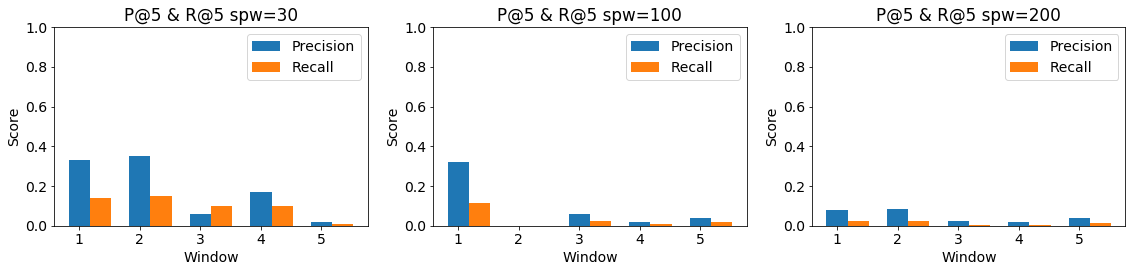

In [15]:
TOPN = 5
results_avg_spw30 = []
results_avg_spw100 = []
results_avg_spw200 = []
for i in range(1,5+1):
    filename_spw30 = './results_csv_spw30/results.p-r.Schilke_OrionSurvey.'+str(i)+'-30.top'+str(TOPN)+'.hot_cores_full.csv'
    filename_spw100 = './results_csv_spw100/results.p-r.Schilke_OrionSurvey.'+str(i)+'-100.top'+str(TOPN)+'.hot_cores_full.csv'
    filename_spw200 = './results_csv_spw200/results.p-r.Schilke_OrionSurvey.'+str(i)+'-200.top'+str(TOPN)+'.hot_cores_full.csv'
    
    results_avg_spw30.append(getResultsAvg(filename_spw30))
    results_avg_spw100.append(getResultsAvg(filename_spw100))
    results_avg_spw200.append(getResultsAvg(filename_spw200))

width = 0.35 # the width of the bars

plt.figure(figsize=(16,4))
#plt.figure()

plt.subplot(131)
plotPrecisionRecall(results_avg_spw30, r"P@"+str(TOPN)+" & R@"+str(TOPN)+" spw=30")

plt.subplot(132)
plotPrecisionRecall(results_avg_spw100, r"P@"+str(TOPN)+" & R@"+str(TOPN)+" spw=100")

plt.subplot(133)
plotPrecisionRecall(results_avg_spw200, r"P@"+str(TOPN)+" & R@"+str(TOPN)+" spw=200")

plt.tight_layout()
plt.show()

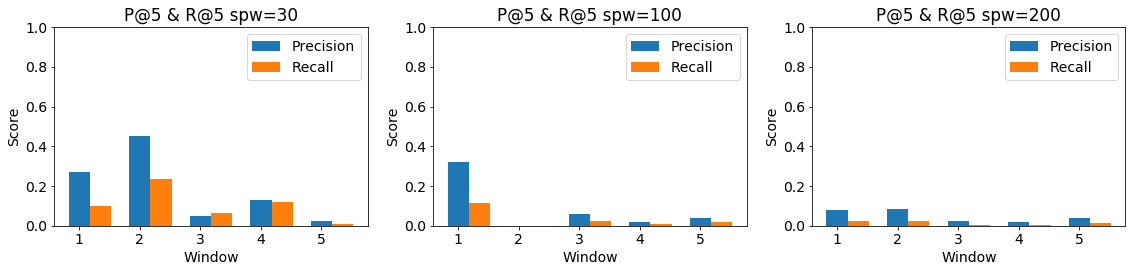

In [18]:
TOPN = 5
results_avg_spw30 = []
results_avg_spw100 = []
results_avg_spw200 = []
for i in range(1,5+1):
    filename_spw30 = './results_csv_spw30_v2/results.p-r.Schilke_OrionSurvey.'+str(i)+'-30.top'+str(TOPN)+'.hot_cores_full.csv'
    filename_spw100 = './results_csv_spw100/results.p-r.Schilke_OrionSurvey.'+str(i)+'-100.top'+str(TOPN)+'.hot_cores_full.csv'
    filename_spw200 = './results_csv_spw200/results.p-r.Schilke_OrionSurvey.'+str(i)+'-200.top'+str(TOPN)+'.hot_cores_full.csv'
    
    results_avg_spw30.append(getResultsAvg(filename_spw30))
    results_avg_spw100.append(getResultsAvg(filename_spw100))
    results_avg_spw200.append(getResultsAvg(filename_spw200))

width = 0.35 # the width of the bars

plt.figure(figsize=(16,4))
#plt.figure()

plt.subplot(131)
plotPrecisionRecall(results_avg_spw30, r"P@"+str(TOPN)+" & R@"+str(TOPN)+" spw=30")

plt.subplot(132)
plotPrecisionRecall(results_avg_spw100, r"P@"+str(TOPN)+" & R@"+str(TOPN)+" spw=100")

plt.subplot(133)
plotPrecisionRecall(results_avg_spw200, r"P@"+str(TOPN)+" & R@"+str(TOPN)+" spw=200")

plt.tight_layout()
plt.show()